In [0]:
%pip install xgboost

Python interpreter will be restarted.
Collecting xgboost
 Downloading xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.19.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.6.2)
Installing collected packages: xgboost
Successfully installed xgboost-1.6.1
WARNING: You are using pip version 21.0.1; however, version 22.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-815b69cf-ed4a-4bae-9d10-e82af34036b9/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
### Import libraries
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import *
import pyspark.sql.functions as F
import math
import itertools

# from databricks.feature_store import *

from pyspark.sql.types import *
from pyspark.sql.functions import when, lit, substring, col, coalesce, lead, datediff, expr, posexplode, year, concat, lpad, month, last_day, add_months, trunc, date_add, greatest
from pyspark.sql.window import Window

### Import libraries
import pandas as pd
from datetime import date, datetime
import numpy as np
from random import seed, choice, randrange
from sklearn.metrics import mean_tweedie_deviance, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV

from matplotlib import pyplot as plt
import seaborn as sns

import xgboost as xgb

In [0]:
rubix5_eda = pd.read_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/export__8_.csv')
rubix5_eda

Out[2]:

,DOT_NUMBER,POLICYID,POLICY_EFF_DT,VEHICLE_NO,POLICY_EXP_DT,POLICYSTATUS,POLICYISSUETYPE,COMPANY,POLICYSTATE,STATE_ADMITTED,NEW_VENTURE,PKGCOMBO,YRSINBUSCT,YRSOFINSCT,POLICY_SEGMENT,OPERATION_EXPOSURE_POLICY,ZONE_GRPCD_POLICY,SCHEDULED_FLEET,VEHICLE_SEGMENT,VEHICLE_TERRITORY,VEHICLE_STATE,MODEL_YEAR,EQUIPMENT_AGE,VIN,RADIUS_GROUP,CLASS_CD,ZONE_GRPCD_VEHICLE,VEHICLE_ZIPCD,CLASS_PRIMARY,CLASS_SECONDARY,VEHICLE_TYPE,TRANSFORM_TERRITORY,TERRITORY_GRP,OPERATION_EXPOSURE_VEHICLE,EARNED_EXP_TRANS,EARNED_EXPOSURES,AVG_DRIVER_SURCHARGE,LIAB_SCHMOD,LIAB_EXPERIMOD,RERATED_PREMIUM,...,DEDUCTIBLE_LIAB_TYPE,DEDUCTIBLE_LIAB_AMT,PREM_WRITTEN_TRANS,PREM_WRITTEN_EFF,PREM_EARNED_EFF,OLEP_TRANS,OLEP_EFF,COVERAGE_GROUP,INDEMNITY_PAID,INDEMNITY_INCURRED,EXPENSE_PAID,EXPENSE_INCURRED,LARGE_LOSSES_100K,LARGE_LOSSES_250K,LARGE_LOSSES_500K,LARGE_LOSSES_1M,LATE_REPORTED_CLAIMS,CLAIM_COUNT_PAID,CLAIM_COUNT_NOT_PAID,CRASH_SCORE,BASIC_ALERTS,DRIVER_INSPECTIONS,DRIVER_OUT_OF_SERVICE,DRIVER_OOS_RATIO,VEHICLE_INSPECTIONS,VEHICLE_OUT_OF_SERVICE,VEHICLE_OOS_RATIO,DRIVING_WITHOUT_CDL,DRIVING_WO_CDL_RATIO,MCS150_UNIT_COUNT,MILEAGE_POWER_UNIT_RATIO,DRIVER_POWER_UNIT_RATIO,HOT_ZONE_INsPECTIONS,HOT_ZONE_RATIO,PREVIOUS_INSURERS,LENGTH_WITH_PRIOR,CRASHES_SEASON_1,CRASHES_SEASON_2,CRASHES_SEASON_3,CRASHES_SEASON_4
0,978324,CAF0000007,2019-04-15,58,2020-04-15,Renewed,Renewal,FREEDOM SPECIALTY,GA,A,OTHER,AUTO LIABILITY ONLY,22.0,NaN,Brokerage Trans,HAZ MAT,NaN,YES,Brokerage Trans,123,GA,2020.0,0-5,5PVNV8JT4L5S55594,LOCAL,334590.0,NaN,30188.0,Heavy Commercial Local Non-fleet,Waste Disposal - All Other,Heavy Commercial Non Zone Truckers,123,GA02,FLATBED,0.254795,0.254795,1.000,1.0,1.0,NaN,...,NaN,NaN,1940.0,1940.0,1940.0,2882.680000,2882.67,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6.0,3.0,29.0,3.0,0.103448,20.0,9.0,0.450000,0.0,0.0,46.0,13956.521739,0.934783,0.0,0.000000,NaN,NaN,1.0,1.0,2.0,1.0
1,3117978,CAF0000009,2019-05-31,14,2020-05-31,Cancelled,Renewal,FREEDOM SPECIALTY,FL,A,2ND YR NEW VENTURE,AUTO LIABILITY ONLY,1.0,NaN,Brokerage Trans,HAZ MAT,NaN,YES,Brokerage Trans,105,FL,2019.0,0-5,1M2GR2GC7KM007440,LOCAL,404590.0,NaN,32808.0,Extra Heavy Local Non-fleet,Waste Disposal - All Other,Extra Heavy Non Zone Truckers,105,FL02,HAZ MAT,0.000000,0.791781,1.000,1.0,1.0,NaN,...,NaN,NaN,15733.0,15733.0,15733.0,23377.860000,23377.89,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,10.0,0.0,13.0,1.0,0.076923,7.0,1.0,0.142857,0.0,0.0,26.0,30000.000000,0.615385,0.0,0.000000,NaN,NaN,0.0,1.0,4.0,1.0
2,Unknown,CAF0000010,2019-06-01,5,2020-06-01,Renewed,New,FREEDOM SPECIALTY,IL,A,OTHER,AUTO LIABILITY ONLY,5.0,NaN,Brokerage Trans,HSLD GOODS,NaN,YES,Brokerage Trans,132,IL,2012.0,6-15,3HAMMAAL8CL608372,LONG,335490.0,NaN,61601.0,Heavy Commercial Intermediate Non-fleet,Specialized Delivery - All Other,Heavy Commercial Non Zone Truckers,132,IL03,HAZ MAT,0.331507,0.331507,1.000,1.0,1.0,NaN,...,NaN,NaN,3882.0,3882.0,3882.0,5768.310000,5768.31,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unknown,CAF0000019,2020-01-06,52,2021-01-06,Did Not Renew,New,FREEDOM SPECIALTY,FL,A,OTHER,AUTO LIABILITY ONLY,5.0,NaN,Brokerage Trans,HAZ MAT,NaN,YES,Brokerage Trans,157,FL,2019.0,0-5,2GCRCNEC1K1179283,LOCAL,14990.0,NaN,34994.0,Light Service Local Non-fleet,Not Otherwise Specified - All Other,Service Non Zone Truckers,157,FL03,HAZ MAT,1.002740,1.002740,1.000,1.0,1.0,NaN,...,NaN,NaN,2674.0,2674.0,2674.0,4013.440000,4013.44,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unknown,CAF0000019,2020-01-06,58,2021-01-06,Did Not Renew,New,FREEDOM SPECIALTY,FL,A,OTHER,AUTO LIABILITY ONLY,5.0,NaN,Brokerage Trans,HAZ MAT,NaN,YES,Brokerage Trans,157,FL,2019.0,0-5,3GCPYAEH8KG213546,LOCAL,14990.0,NaN,34994.0,Light Service Local Non-fleet,Not Otherwise Specified - All Other,Service Non Zone Truckers,157,FL03,HAZ MAT,0.920548,0.920548,1.000,1.0,1.0,NaN,...,NaN,NaN,2455.0,2455.0,2455.0,3684.740000,3684.76

In [0]:

#target construction
#Target - CLAIM_COUNT_PAID / EARNED_EXPOSURES
rubix5_eda['TARGET'] = rubix5_eda['CLAIM_COUNT_PAID']/rubix5_eda['EARNED_EXPOSURES']
#Target_binary - 1 if CLAIM_COUNT_PAID > 0 else 0
rubix5_eda['TARGET_BINARY'] = rubix5_eda['CLAIM_COUNT_PAID'].apply(lambda x: 1 if x>0 else 0)

# apply filters - prepared by Julie, Thank you, Julie!
"""
    The Rubix 5 dataset is already limited to:
-Policies effective 1-1-2015 and later
-CSL only
-Power units only (no trailers)
-For Hire Trucking only (no public auto, business auto or garage)

Onyshchenko, Igor Additional filters needed will be SCHEDULED_FLEET = "YES" and COMPANY <> "FREEDOM SPECIALTY"
I think this covers it.  Let me know if anyone thinks I missed anything.
"""

rubix5_eda = rubix5_eda[rubix5_eda['SCHEDULED_FLEET']=="YES"]
rubix5_eda = rubix5_eda[rubix5_eda['COMPANY'] != 'FREEDOM SPECIALTY']

# there still was 'Brokerage Trans' and 'Business Auto' for I'm filtering it
rubix5_eda = rubix5_eda[rubix5_eda['VEHICLE_SEGMENT'].isin(['Large Fleet','Mid Fleet','Non Fleet'])]
rubix5_eda = rubix5_eda[rubix5_eda['POLICY_SEGMENT'].isin(['Large Fleet','Mid Fleet','Non Fleet'])]

#filtering earned exposures ==0 572 cases and <0 in 13 cases
rubix5_eda = rubix5_eda[rubix5_eda['EARNED_EXPOSURES'] > 0]

#filtering POLICYSTATE != 'HI' and 'MA'
rubix5_eda = rubix5_eda[rubix5_eda['POLICYSTATE'].isin(['HI', 'MA']) == False]

# filtering CLASS_CODE != 748900 - Non-Trucking 
rubix5_eda = rubix5_eda[rubix5_eda['CLASS_CD']!=748900]


# adding a column from Julie
rubix5_eda['REGION'] = rubix5_eda['POLICYSTATE'].copy()
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'CA', 'REGION'] = 'CALIFORNIA' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'FL', 'REGION'] = 'FLORIDA' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'TX', 'REGION'] = 'TEXAS' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["CT","DE","MA","MD","ME","NH","NJ","NY","PA","RI","VA","VT","WV"]), 'REGION'] = 'EAST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["IA","IL","IN","KS","KY","MI","MN","MO","ND","NE","OH","OK","SD","WI"]), 'REGION'] = 'MIDWEST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AL","AR","GA","LA","MS","NC","SC","TN"]), 'REGION'] = 'SOUTHEAST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AZ","CO","ID","MT","NM","NV","OR","UT","WA","WY"]), 'REGION'] = 'WEST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AK","HI"]), 'REGION'] = 'OTHER' 



# initial feature engineering
rubix5_eda['POLICY_YEAR'] = rubix5_eda['POLICY_EFF_DT'].apply(lambda x: str(x)[:4]).astype('int')
rubix5_eda['POLICY_MONTH'] = rubix5_eda['POLICY_EFF_DT'].apply(lambda x: str(x)[5:7]).astype('int')

# MODEL AGE
rubix5_eda['MODEL_AGE'] = rubix5_eda['POLICY_YEAR'] - rubix5_eda['MODEL_YEAR'] + 1

# target definition
rubix5_eda['TARGET'] = rubix5_eda['CLAIM_COUNT_PAID'] / rubix5_eda['EARNED_EXPOSURES']
rubix5_eda['TARGET_BINARY'] = rubix5_eda['CLAIM_COUNT_PAID'].apply(lambda x: 1 if x>0 else 0)

# Date to Numeric for Control Model
rubix5_eda['NUMERIC_DATE'] = rubix5_eda['POLICY_EFF_DT'].apply(lambda x: (pd.Timestamp('2021-01-01') - pd.Timestamp(x))/np.timedelta64(1, 'M') + 12).astype('int') 

rubix5_eda = rubix5_eda[rubix5_eda['POLICY_YEAR']<2021]

#resetting indexes
rubix5_eda.reset_index(drop=True, inplace = True)


# keep only features that can be used for modelling
# the list of features prepared by Amanpreet and checked by Jason and Tyler, Thank you guys!

selected_columns = ['POLICYID',
'POLICY_EFF_DT',
'NUMERIC_DATE',
'POLICYSTATUS',
'POLICYISSUETYPE',
'COMPANY',
'NEW_VENTURE',
'PKGCOMBO',
'YRSINBUSCT',
'YRSOFINSCT',
'POLICYSTATE',
'POLICY_SEGMENT',
'SCHEDULED_FLEET',
'VEHICLE_SEGMENT',
'VEHICLE_STATE',
'MODEL_YEAR',
'EQUIPMENT_AGE',
'VIN',
'RADIUS_GROUP',
'ZONE_GRPCD_VEHICLE',
'VEHICLE_ZIPCD',
'VEHICLE_TYPE',
'TRANSFORM_TERRITORY',
'TERRITORY_GRP',
'OPERATION_EXPOSURE_VEHICLE',
'AVG_DRIVER_SURCHARGE',
'VEHICLE_COUNT',
'LIMIT_CSL',
'DEDUCTIBLE_LIAB_TYPE',
'DEDUCTIBLE_LIAB_AMT',
'EARNED_EXPOSURES',
'CLAIM_COUNT_PAID',
# CAB features
# 'CRASH_SCORE',
# 'BASIC_ALERTS',
# 'DRIVER_INSPECTIONS',
# 'DRIVER_OUT_OF_SERVICE',
# 'DRIVER_OOS_RATIO',
# 'VEHICLE_INSPECTIONS',
# 'VEHICLE_OUT_OF_SERVICE',
# 'VEHICLE_OOS_RATIO',
# 'DRIVING_WITHOUT_CDL',
# 'DRIVING_WO_CDL_RATIO',
# 'MCS150_UNIT_COUNT',
# 'MILEAGE_POWER_UNIT_RATIO',
# 'DRIVER_POWER_UNIT_RATIO',
# 'HOT_ZONE_INsPECTIONS',
# 'HOT_ZONE_RATIO',
# 'PREVIOUS_INSURERS',
# 'LENGTH_WITH_PRIOR',
# 'CRASHES_SEASON_1',
# 'CRASHES_SEASON_2',
# 'CRASHES_SEASON_3',
# 'CRASHES_SEASON_4',
'REGION'
]

# RATING PLAN VARIABLES:
rating_plan_variables = ['POLICYID', 'DOT_NUMBER', 'TARGET','CLAIM_COUNT_PAID', 'EARNED_EXPOSURES',
'POLICY_EFF_DT',
'POLICYSTATUS', 'POLICYISSUETYPE',
'VEHICLE_NO',
# Intercept Model
'YRSINBUSCT', 'VEHICLE_COUNT', 'MODEL_AGE',
# Control Variables ?number of days
'POLICY_YEAR', 'POLICY_MONTH', 'REGION', 'POLICY_SEGMENT', 'NUMERIC_DATE',
# Model Variables Rating Plan
'OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']

df = rubix5_eda[rating_plan_variables]
df = df[df['DOT_NUMBER'] != 'Unknown']
df['POLICY_SEGMENT'] = df['POLICY_SEGMENT'].apply(lambda x: x.replace(' ','_'))
df.reset_index(drop=True, inplace = True)
df

Out[3]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE
0,CAI0038074,831876,0.0,0,0.005479,2015-02-24,Renewed,Renewal,4,19.0,8.0,9.0,2015,2,TEXAS,Non_Fleet,82,OTHER,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,3RD YR NEW VENTURE,LOCAL,6-15
1,CAI0044410,643526,0.0,0,1.000000,2018-04-29,Renewed,Renewal,16,48.0,17.0,9.0,2018,4,MIDWEST,Mid_Fleet,44,WASTE DISP,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15
2,CAI0048094,422450,0.0,0,0.947945,2015-10-25,Renewed,Renewal,30,16.0,26.0,20.0,2015,10,MIDWEST,Mid_Fleet,74,OTHER,Yard Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16
3,CAI0048097,422450,0.0,0,1.000000,2016-10-25,Renewed,Renewal,7,19.0,30.0,15.0,2016,10,MIDWEST,Mid_Fleet,62,OTHER,Yard Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15
4,CAI0057005,1863733,0.0,0,0.347945,2018-07-01,Renewed,Renewal,4,16.0,5.0,14.0,2018,7,EAST,Non_Fleet,42,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162361,RSS0004052,1662777,0.0,0,1.002740,2019-04-09,Did Not Renew,Renewal,9,13.0,5.0,8.0,2019,4,CALIFORNIA,Non_Fleet,32,HSLD GOODS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15
162362,RSS0004057,2611241,0.0,0,0.323288,2019-04-27,Did Not Renew,New,7,5.0,4.0,8.0,2019,4,CALIFORNIA,Non_Fleet,32,COAL,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15
162363,RSS0004075,2905096,0.0,0,1.002740,2019-06-13,Did Not Renew,Renewal,2,6.0,3.0,16.0,2019,6,CALIFORNIA,Non_Fleet,30,COAL,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16
162364,RSS0004180,2600707,0.0,0,1.000000,2020-07-12,Renewed,Renewal,2,23.0,2.0,4.0,2020,7,CALIFORNIA,Non_Fleet,17,WASTE-COMM,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,0-5


In [0]:

np.random.seed(14)

dots_train = pd.DataFrame()
dots_train['DOT_NUMBER'] = df['DOT_NUMBER'].drop_duplicates()
dots_train.reset_index(drop=True, inplace=True)
dots_train['is_train'] = np.random.binomial(1, 0.6, dots_train.shape[0])
dots_train.loc[dots_train['is_train']==0, 'is_eval'] = np.random.binomial(1, 0.5, dots_train[dots_train['is_train']==0].shape[0])

train = df.merge(dots_train, how='left', on=['DOT_NUMBER'])

X_train = train[train['is_train']==1]
y_train = train[train['is_train']==1]['TARGET']

X_test = train[(train['is_train']==0)&(train['is_eval']==0)]
y_test = train[(train['is_train']==0)&(train['is_eval']==0)]['TARGET']

X_eval = train[(train['is_train']==0)&(train['is_eval']==1)]
y_eval = train[(train['is_train']==0)&(train['is_eval']==1)]['TARGET']

# #reset indexes
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

X_eval.reset_index(drop = True, inplace = True)
y_eval.reset_index(drop = True, inplace = True)

print(X_train['VEHICLE_COUNT'].describe(), y_train.mean())
print(X_test['VEHICLE_COUNT'].describe(), y_test.mean())
print(X_eval['VEHICLE_COUNT'].describe(), y_eval.mean())

total = X_train.append(X_test).append(X_eval)
total.reset_index(drop = True, inplace = True)

X_train.shape, X_test.shape, X_eval.shape, total.shape

count 96863.000000
mean 9.470902
std 11.209075
min 1.000000
25% 2.000000
50% 5.000000
75% 12.000000
max 76.000000
Name: VEHICLE_COUNT, dtype: float64 0.10099989574467992
count 32435.000000
mean 13.408571
std 26.269252
min 1.000000
25% 2.000000
50% 6.000000
75% 13.000000
max 190.000000
Name: VEHICLE_COUNT, dtype: float64 0.11062965822291078
count 32662.000000
mean 9.951105
std 11.874102
min 1.000000
25% 2.000000
50% 6.000000
75% 12.000000
max 88.000000
Name: VEHICLE_COUNT, dtype: float64 0.10875842402803894
Out[4]: ((97082, 25), (32548, 25), (32736, 25), (162366, 25))

In [0]:
control_variables = ['NUMERIC_DATE', 'REGION','POLICY_SEGMENT']

for c in ['REGION','POLICY_SEGMENT']:
  X_train[c] = X_train[c].astype('category')
  X_eval[c] = X_train[c].astype('category')
  X_test[c] = X_train[c].astype('category')
  
  
# creating XGB Data Martices with weights
dtrain = xgb.DMatrix(X_train[control_variables], label=X_train['TARGET'], weight = X_train['EARNED_EXPOSURES'], enable_categorical=True)
deval = xgb.DMatrix(X_eval[control_variables], label=X_eval['TARGET'], weight = X_eval['EARNED_EXPOSURES'], enable_categorical=True)
dtest = xgb.DMatrix(X_test[control_variables], enable_categorical=True)
# doot = xgb.DMatrix(oot_test, label=OOT['TARGET'])


<command-3628834684402591>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train[c] = X_train[c].astype('category')
<command-3628834684402591>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval[c] = X_train[c].astype('category')
<command-3628834684402591>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test[c] = X_train[c].astype('category')

{'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 209
train-rmse-mean 0.374502
train-rmse-std 0.007513
test-rmse-mean 0.375946
test-rmse-std 0.015774
Name: 208, dtype: float64
{'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 500
train-rmse-mean 0.376192
train-rmse-std 0.007457
test-rmse-mean 0.377520
test-rmse-std 0.015204
Name: 499, dtype: float64
{'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 102
train-rmse-mean 0.374511
train-rmse-std 0.007511
test-rmse-mean 0.375952
test-rmse-std 0.015762
Name: 101, dtype: float64
{'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 186
train-rmse-mean 0.374068
train-rmse-std 0.007548
test-rmse-mean 0.376082
test-rmse-std 0.015704
Name: 185, dtype: float64
{'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 101
train-rmse-mean 0.374020
train-rmse-std 0.007545
test-rmse-mean 0.376088
test-rmse-std 0.015716
Name: 100, dtype: float64

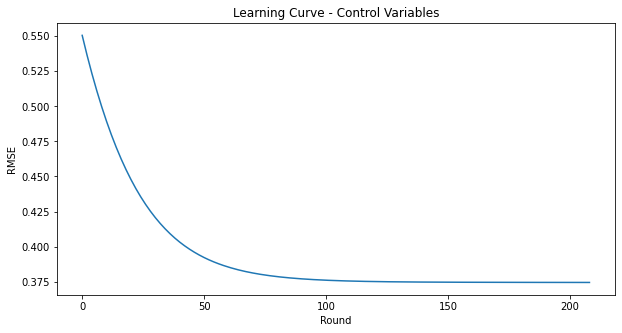

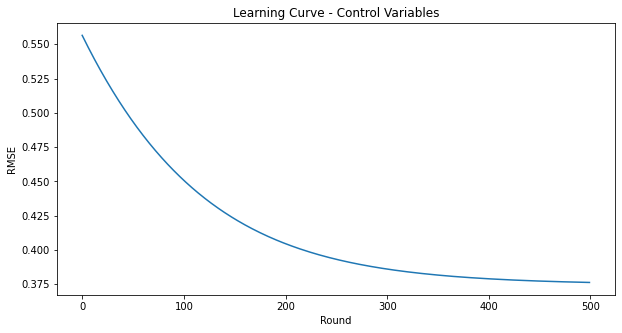

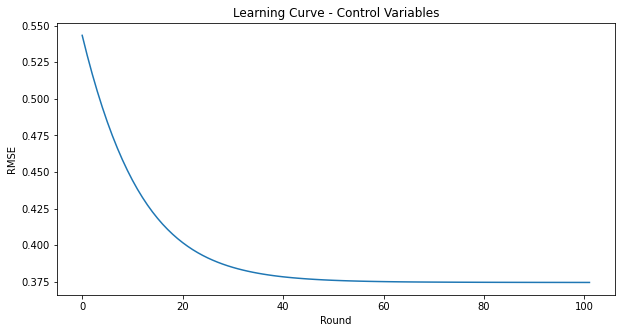

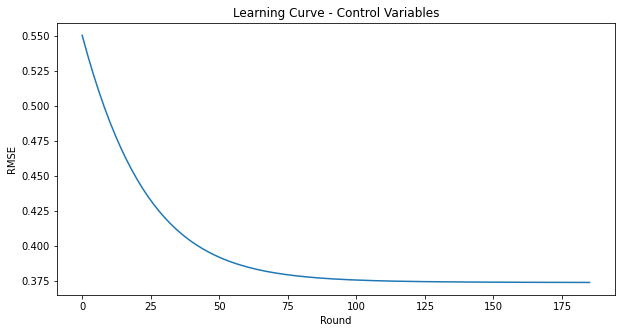

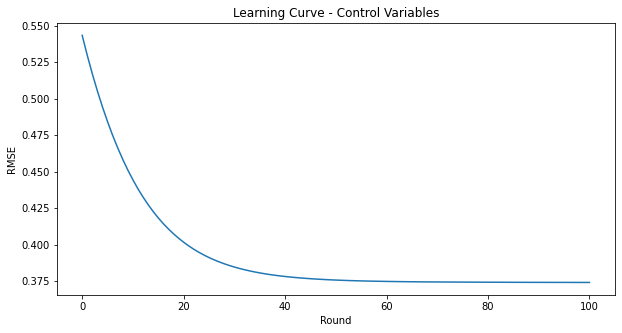

In [0]:
# Manual Splitting CV
dots = X_train['DOT_NUMBER'].drop_duplicates()
train1 = X_train[X_train['DOT_NUMBER'].isin(dots[:2000])==False].index
test1 = X_train[X_train['DOT_NUMBER'].isin(dots[:2000])].index

train2 = X_train[X_train['DOT_NUMBER'].isin(dots[2000:6000])==False].index
test2 = X_train[X_train['DOT_NUMBER'].isin(dots[2000:6000])].index

train3 = X_train[X_train['DOT_NUMBER'].isin(dots[6000:])==False].index
test3 = X_train[X_train['DOT_NUMBER'].isin(dots[6000:])].index

tsFolds = [(train1, test1), (train2, test2), (train3, test3)]


# Cross-Validation score
params = [{ 'max_depth': 3,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 3,
           'learning_rate': 0.01,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 3,
           'learning_rate': 0.1,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 6,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 6,
           'learning_rate': 0.1,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         }
          
         ]

for p in params:
  print(p)
  cv_results = xgb.cv(dtrain=dtrain, 
                      params=p, 
                      nfold = len(tsFolds),
                      folds = tsFolds,
                      num_boost_round=500,
                      early_stopping_rounds=10,
                      metrics="rmse", 
                      as_pandas=True, 
                      seed=123)

  print('Best number of trees = {}'.format(cv_results.shape[0]))
  print(cv_results.iloc[-1,:])

  # Learning Curve
  plt.figure(figsize = (10,5))
  plt.title('Learning Curve - Control Variables')
  plt.plot(cv_results.iloc[:,0])
  plt.ylabel("RMSE")
  plt.xlabel('Round')

In [0]:

params = {'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}

clf = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,
    evals=[(deval, "eval")],
    early_stopping_rounds=10,
    verbose_eval=False
)

Test Set Prediction - Fact outcome (3 groups)
<command-3628834684402589>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_control'] = clf.predict(dtrain)
<command-3628834684402589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_control_grp'] = pd.qcut(X_train['pred_control'], 3)

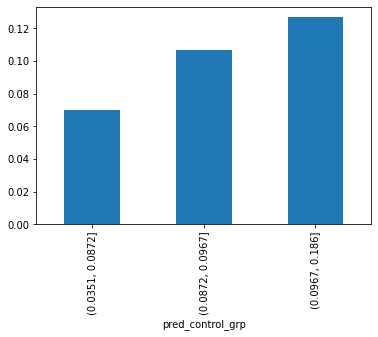

TARGET 
 size mean
pred_control_grp 
(0.0351, 0.0872] 32678.0 0.070157
(0.0872, 0.0967] 32047.0 0.106496
(0.0967, 0.186] 32357.0 0.126706
Test Set Prediction - Fact outcome (3 groups)
<command-3628834684402589>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_control'] = clf.predict(deval)
<command-3628834684402589>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_control_grp'] = pd.qcut(X_eval['pred_control'], 3)

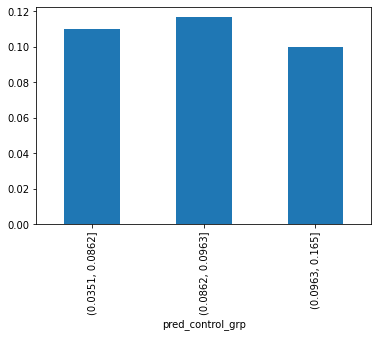

TARGET 
 size mean
pred_control_grp 
(0.0351, 0.0862] 10916.0 0.109973
(0.0862, 0.0963] 10909.0 0.116621
(0.0963, 0.165] 10911.0 0.099682
Test Set Prediction - Fact outcome (3 groups)
<command-3628834684402589>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_control'] = clf.predict(dtest)
<command-3628834684402589>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_control_grp'] = pd.qcut(X_test['pred_control'], 3)

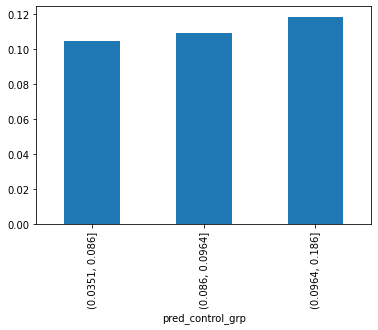

TARGET 
 size mean
pred_control_grp 
(0.0351, 0.086] 10863.0 0.104329
(0.086, 0.0964] 10913.0 0.109120
(0.0964, 0.186] 10772.0 0.118513

In [0]:
# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_train['pred_control'] = clf.predict(dtrain)
X_train['pred_control_grp'] = pd.qcut(X_train['pred_control'], 3)
t = X_train.groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_eval['pred_control'] = clf.predict(deval)
X_eval['pred_control_grp'] = pd.qcut(X_eval['pred_control'], 3)
t = X_eval.groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)


# Test Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_test['pred_control'] = clf.predict(dtest)
X_test['pred_control_grp'] = pd.qcut(X_test['pred_control'], 3)
t = X_test.groupby('pred_control_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

In [0]:
# RATING PLAN VARIABLES:
rating_plan_variables = ['POLICYID', 'DOT_NUMBER', 'TARGET','CLAIM_COUNT_PAID', 'EARNED_EXPOSURES',
'POLICY_EFF_DT',
'POLICYSTATUS',
# Intercept Model
'YRSINBUSCT', 'VEHICLE_COUNT', 'MODEL_AGE',
# Control Variables ?number of days
'POLICY_YEAR', 'POLICY_MONTH', 'REGION', 'POLICY_SEGMENT', 'NUMERIC_DATE',
# Model Variables Rating Plan
'OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']


variables = ['NUMERIC_DATE', 'REGION','POLICY_SEGMENT', 'OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']

# # dummy variables
# gb_train = pd.get_dummies(X_train[variables], columns=['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE'])
# all_dummies = list(gb_train.columns)

# gb_eval = pd.get_dummies(X_eval[variables], columns=['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE'])
# gb_eval = gb_eval.reindex(columns = all_dummies, fill_value=0)

# gb_test = pd.get_dummies(X_test[variables], columns=['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE'])
# gb_test = gb_test.reindex(columns = all_dummies, fill_value=0)


# NO dummy variables
gb_train = X_train[variables].copy()
gb_eval = X_eval[variables].copy()
gb_test = X_test[variables].copy()

for f in ['REGION','POLICY_SEGMENT','OPERATION_EXPOSURE_VEHICLE', 'VEHICLE_TYPE', 'PKGCOMBO', 'NEW_VENTURE', 'RADIUS_GROUP', 'EQUIPMENT_AGE']:
  gb_train[f] = gb_train[f].astype('category')
  gb_eval[f] = gb_eval[f].astype('category')
  gb_test[f] = gb_test[f].astype('category')


# creating XGB Data Martices with weights
dtrain = xgb.DMatrix(gb_train, label=X_train['TARGET'], weight = X_train['EARNED_EXPOSURES'], enable_categorical=True)
deval = xgb.DMatrix(gb_eval, label=X_eval['TARGET'], weight = X_eval['EARNED_EXPOSURES'], enable_categorical=True)
dtest = xgb.DMatrix(gb_test, enable_categorical=True)
# doot = xgb.DMatrix(oot_test, label=OOT['TARGET'])



{'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 246
train-rmse-mean 0.373669
train-rmse-std 0.007527
test-rmse-mean 0.375329
test-rmse-std 0.015829
Name: 245, dtype: float64
{'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 500
train-rmse-mean 0.375660
train-rmse-std 0.007473
test-rmse-mean 0.377028
test-rmse-std 0.015432
Name: 499, dtype: float64
{'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 137
train-rmse-mean 0.373602
train-rmse-std 0.007533
test-rmse-mean 0.375342
test-rmse-std 0.015835
Name: 136, dtype: float64
{'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 193
train-rmse-mean 0.371598
train-rmse-std 0.007393
test-rmse-mean 0.375333
test-rmse-std 0.015795
Name: 192, dtype: float64
{'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}
Best number of trees = 98
train-rmse-mean 0.371532
train-rmse-std 0.007413
test-rmse-mean 0.375364
test-rmse-std 0.015796
Name: 97, dtype: float64

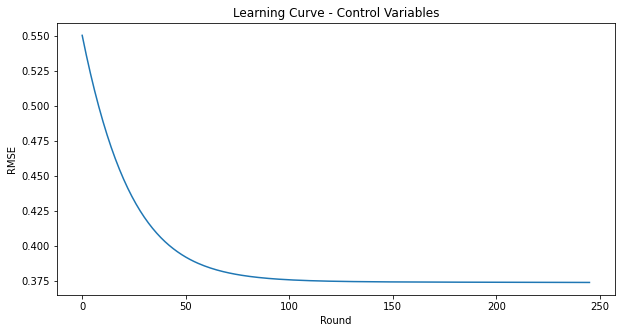

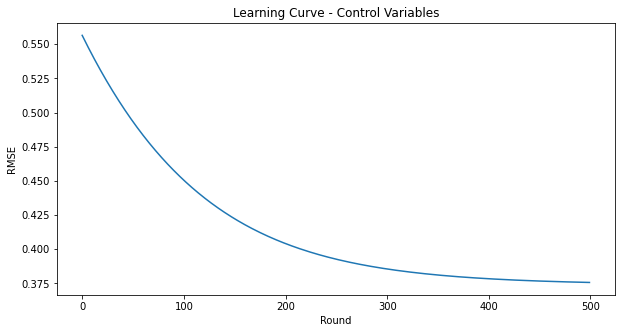

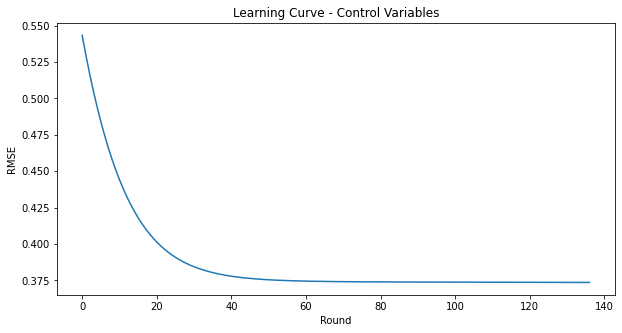

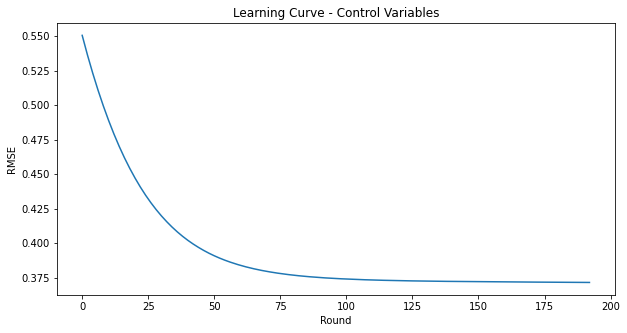

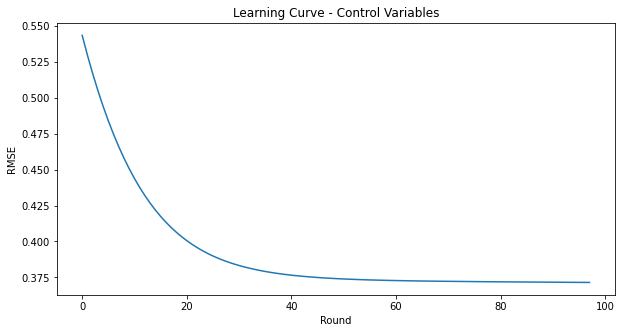

In [0]:

# Cross-Validation score
params = [{ 'max_depth': 3,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 3,
           'learning_rate': 0.01,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 3,
           'learning_rate': 0.1,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 6,
           'learning_rate': 0.05,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         },
          { 'max_depth': 6,
           'learning_rate': 0.1,
           'colsample_bytree': 0.7,
           'min_child_weight': 1,
           'subsample': 0.8,
          'objective':'count:poisson',
         }
          
         ]

for p in params:
  print(p)
  cv_results = xgb.cv(dtrain=dtrain, 
                      params=p, 
                      nfold = len(tsFolds),
                      folds = tsFolds,
                      num_boost_round=500,
                      early_stopping_rounds=10,
                      metrics="rmse", 
                      as_pandas=True, 
                      seed=123)

  print('Best number of trees = {}'.format(cv_results.shape[0]))
  print(cv_results.iloc[-1,:])

  # Learning Curve
  plt.figure(figsize = (10,5))
  plt.title('Learning Curve - Control Variables')
  plt.plot(cv_results.iloc[:,0])
  plt.ylabel("RMSE")
  plt.xlabel('Round')

# # params = { 'max_depth': [3,6],
# #            'learning_rate': [0.01, 0.05, 0.1],
# #            'n_estimators': [100, 200],
# #            'colsample_bytree': [0.7,1],
# #            'min_child_weight': [1],
# #            'subsample': [0.8, 1]
# #          }



# # Cross-Validation score
# params = { 'max_depth': 3,
#            'learning_rate': 0.05,
#            'colsample_bytree': 0.7,
#            'min_child_weight': 1,
#            'subsample': 0.8,
#           'objective':'count:poisson',
#          }


# cv_results = xgb.cv(dtrain=dtrain, 
#                     params=params, 
#                     nfold = len(tsFolds),
#                     folds = tsFolds,
#                     num_boost_round=500,
#                     early_stopping_rounds=10,
#                     metrics="rmse", 
#                     as_pandas=True, 
#                     seed=123)

# print('Best number of trees = {}'.format(cv_results.shape[0]))

# # Learning Curve
# plt.figure(figsize = (10,5))
# plt.title('Learning Curve - Control Variables')
# plt.plot(cv_results.iloc[:,0])
# plt.ylabel("RMSE")
# plt.xlabel('Round')

In [0]:

params = {'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'count:poisson'}


clf2 = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,
    evals=[(deval, "eval")],
    early_stopping_rounds=10,
    verbose_eval=False
)

Test Set Prediction - Fact outcome (3 groups)
<command-3628834684402712>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_rating'] = clf2.predict(dtrain)
<command-3628834684402712>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_train['pred_rating_grp'] = pd.qcut(X_train['pred_rating'], 3)

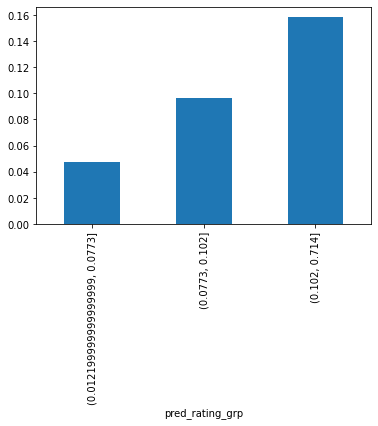

TARGET 
 size mean
pred_rating_grp 
(0.012199999999999999, 0.0773] 32362.0 0.047771
(0.0773, 0.102] 32373.0 0.096801
(0.102, 0.714] 32347.0 0.158456
Test Set Prediction - Fact outcome (3 groups)
<command-3628834684402712>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_rating'] = clf2.predict(deval)
<command-3628834684402712>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_eval['pred_rating_grp'] = pd.qcut(X_eval['pred_rating'], 3)

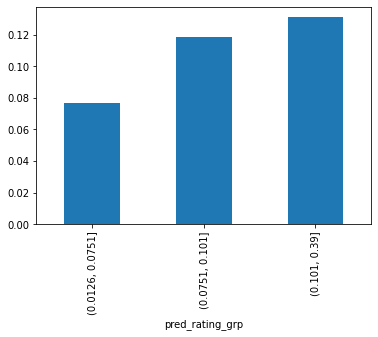

TARGET 
 size mean
pred_rating_grp 
(0.0126, 0.0751] 10914.0 0.076960
(0.0751, 0.101] 10912.0 0.118199
(0.101, 0.39] 10910.0 0.131126
Test Set Prediction - Fact outcome (3 groups)
<command-3628834684402712>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_rating'] = clf2.predict(dtest)
<command-3628834684402712>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 X_test['pred_rating_grp'] = pd.qcut(X_test['pred_rating'], 3)

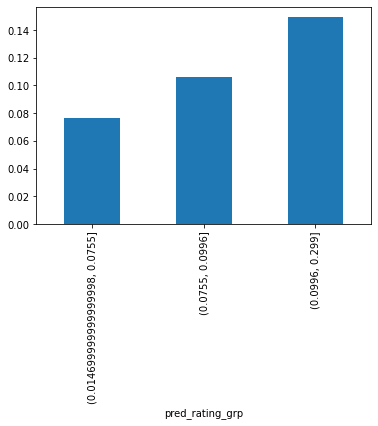

TARGET 
 size mean
pred_rating_grp 
(0.014699999999999998, 0.0755] 10850.0 0.076660
(0.0755, 0.0996] 10849.0 0.105875
(0.0996, 0.299] 10849.0 0.149357

In [0]:
# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_train['pred_rating'] = clf2.predict(dtrain)
X_train['pred_rating_grp'] = pd.qcut(X_train['pred_rating'], 3)
t = X_train.groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

# Train Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_eval['pred_rating'] = clf2.predict(deval)
X_eval['pred_rating_grp'] = pd.qcut(X_eval['pred_rating'], 3)
t = X_eval.groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)


# Test Sample
print('Test Set Prediction - Fact outcome (3 groups)')
X_test['pred_rating'] = clf2.predict(dtest)
X_test['pred_rating_grp'] = pd.qcut(X_test['pred_rating'], 3)
t = X_test.groupby('pred_rating_grp').agg({'TARGET': [np.size, np.mean]})

t['TARGET']['mean'].plot(kind = 'bar')
plt.show()
print(t)

In [0]:
# Aggregate train + test + eval results
total = X_train.append(X_eval).append(X_test)
total.reset_index(drop = True, inplace = True)
total['pred_rating_grp'] = pd.qcut(total['pred_rating'], 3)
total['pred_control_grp'] = pd.qcut(total['pred_control'], 3)

total

Out[13]:

,POLICYID,DOT_NUMBER,TARGET,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICY_EFF_DT,POLICYSTATUS,POLICYISSUETYPE,VEHICLE_NO,YRSINBUSCT,VEHICLE_COUNT,MODEL_AGE,POLICY_YEAR,POLICY_MONTH,REGION,POLICY_SEGMENT,NUMERIC_DATE,OPERATION_EXPOSURE_VEHICLE,VEHICLE_TYPE,PKGCOMBO,NEW_VENTURE,RADIUS_GROUP,EQUIPMENT_AGE,is_train,is_eval,pred_control,pred_control_grp,pred_rating,pred_rating_grp
0,CAI0038074,831876,0.0,0,0.005479,2015-02-24,Renewed,Renewal,4,19.0,8.0,9.0,2015,2,TEXAS,Non_Fleet,82,OTHER,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,3RD YR NEW VENTURE,LOCAL,6-15,1,NaN,0.109771,"(0.0966, 0.186]",0.093025,"(0.0764, 0.101]"
1,CAI0057005,1863733,0.0,0,0.347945,2018-07-01,Renewed,Renewal,4,16.0,5.0,14.0,2018,7,EAST,Non_Fleet,42,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,6-15,1,NaN,0.087722,"(0.0868, 0.0966]",0.058449,"(0.012199999999999999, 0.0764]"
2,CAI0060872,2730613,0.0,0,0.972603,2015-01-31,Renewed,New,3,NaN,2.0,5.0,2015,1,CALIFORNIA,Non_Fleet,83,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.082315,"(0.0351, 0.0868]",0.067768,"(0.012199999999999999, 0.0764]"
3,CAO0220579,2427068,0.0,0,1.000000,2015-01-01,Did Not Renew,Renewal,13,3.0,NaN,9.0,2015,1,TEXAS,Mid_Fleet,84,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,6-15,1,NaN,0.055047,"(0.0351, 0.0868]",0.077748,"(0.0764, 0.101]"
4,CAO0253809,1960567,0.0,0,1.000000,2016-04-10,Did Not Renew,Renewal,6,10.0,6.0,4.0,2016,4,TEXAS,Non_Fleet,68,OTHER,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,1,NaN,0.108784,"(0.0966, 0.186]",0.065314,"(0.012199999999999999, 0.0764]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162361,RSO0003677,2157326,0.0,0,0.482192,2019-05-16,Did Not Renew,Renewal,9,10.0,5.0,17.0,2019,5,MIDWEST,Non_Fleet,31,LIVESTOCK,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,Over 16,0,0.0,0.076451,"(0.0351, 0.0868]",0.053394,"(0.012199999999999999, 0.0764]"
162362,RSO0004401,3014097,0.0,0,1.000000,2020-06-01,Renewed,Renewal,1,3.0,3.0,21.0,2020,6,MIDWEST,Non_Fleet,19,LOGGING,Extra-heavy Truck-tractors Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,LOCAL,Over 16,0,0.0,0.060049,"(0.0351, 0.0868]",0.039581,"(0.012199999999999999, 0.0764]"
162363,RSS0000341,2013460,0.0,0,1.000000,2018-05-08,Renewed,Renewal,4,13.0,7.0,4.0,2018,5,MIDWEST,Non_Fleet,43,DUMPING,Extra Heavy Non Zone Truckers,AUTO LIABILITY ONLY,OTHER,LOCAL,0-5,0,0.0,0.092978,"(0.0868, 0.0966]",0.079656,"(0.0764, 0.101]"
162364,RSS0000430,1930113,0.0,0,1.000000,2018-05-26,Did Not Renew,Renewal,1,17.0,4.0,7.0,2018,5,CALIFORNIA,Non_Fleet,43,TRUCKERS,Heavy Commercial Non Zone Truckers,AUTO LIABILITY & AUTO PD ONLY,OTHER,INTERMEDIATE,6-15,0,0.0,0.089306,"(0.0868, 0.0966]",0.093153,"(0.0764, 0.101]"


Out[14]:

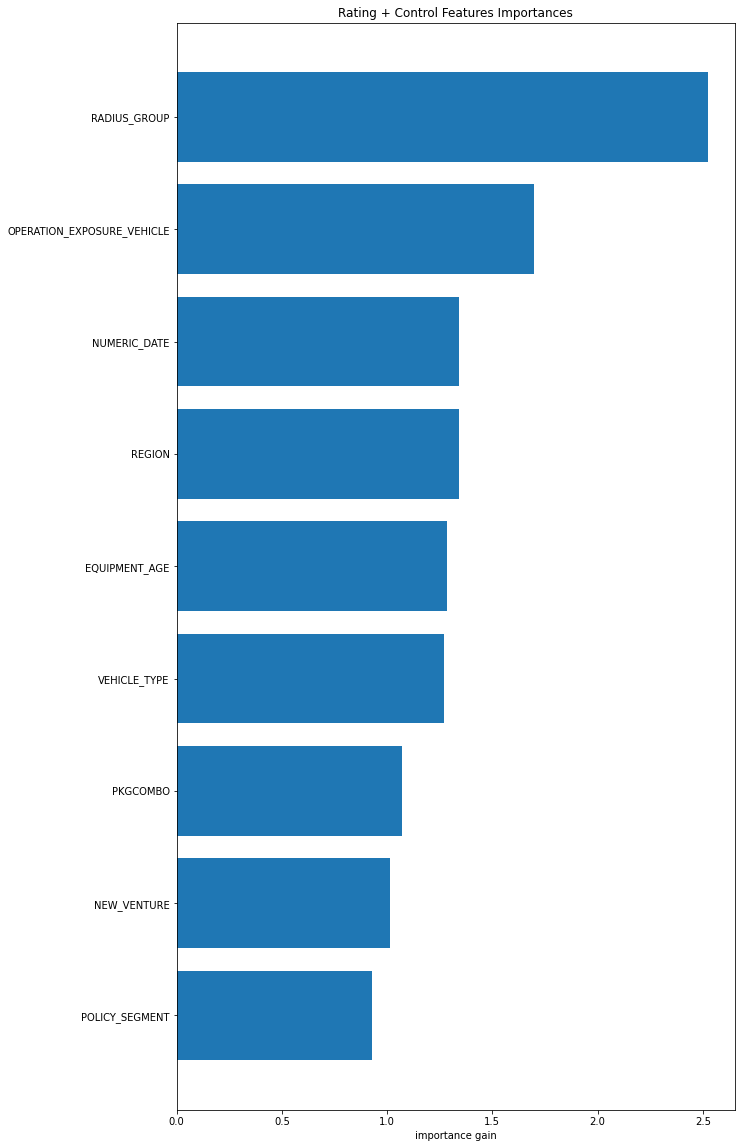

Text(0.5, 0, 'importance gain')

In [0]:

# Control deatures model importances
imp1 = pd.DataFrame()

imp1['values'] = clf2.get_score(importance_type='gain').values()
imp1['names'] = clf2.get_score(importance_type='gain').keys()
imp1.sort_values(by=['values'], inplace=True)
plt.figure(figsize = (10,20))
plt.title('Rating + Control Features Importances')
plt.barh(y = imp1['names'], width = imp1['values'])
plt.xlabel('importance gain')


In [0]:
# saving model to pickle object
import pickle

file_name = "/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/xgb_rating_plan_category.pkl"

# save
pickle.dump(clf2, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
xgb_model_loaded.predict(dtest)[0] == clf2.predict(dtest)[0]




Out[15]: True